In [54]:
import os
import numpy as np

import shapely

import clima_anom as ca

import matplotlib.cbook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [55]:
data_dir = 'D:/Data/PF/ENSEMBLE/SA/nc/ENSEMBLE_count_NCONV_GT_1.nc'
data = ca.read_netcdf(data_dir,2)
lon = data['lon'].data
lat = data['lat'].data
count = data['count'].data

lon2d, lat2d = np.meshgrid(lon, lat)

count_mean = np.nanmean(count, axis=0)
count_sum = np.nansum(count, axis=0)

count_clear = ca.remove_continent_ocean(count_mean,lat,lon,'ocean')

lat : (120,)
lon : (110,)
time : (63,)
count : (63, 120, 110)


C:\Users\isela\AppData\Local\Temp\ipykernel_17728\1852043360.py:9: RuntimeWarning: Mean of empty slice
  count_mean = np.nanmean(count, axis=0)


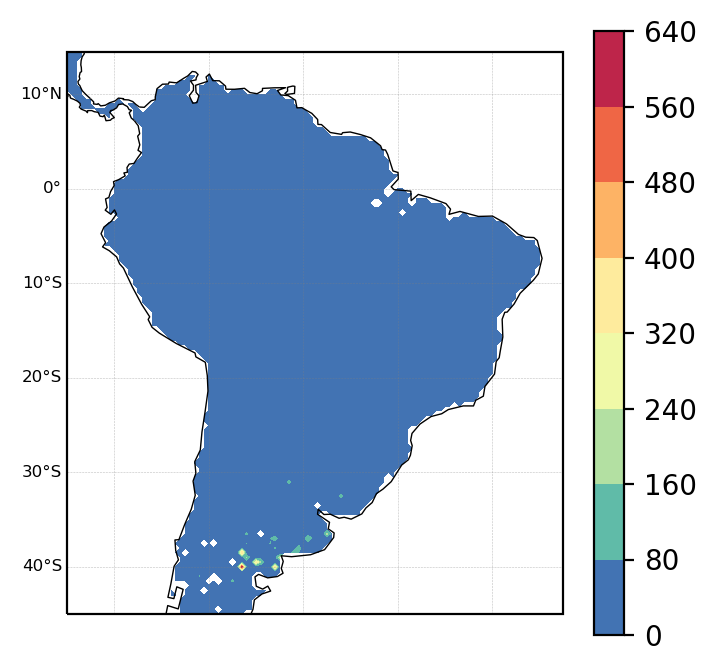

In [56]:
cmap = plt.cm.Spectral_r

levels = None

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=200)
gs = gridspec.GridSpec(1,1)

#=====================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax1.set_extent([-80,-60,-20,0],crs=proj)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

a1 = ax1.contourf(lon2d, lat2d, count_clear, cmap=cmap, levels=levels)

plt.colorbar(a1)

In [15]:
np.nanmax(np.nanmean(count,axis=0))

C:\Users\isela\AppData\Local\Temp\ipykernel_17728\4238575277.py:1: RuntimeWarning: Mean of empty slice
  np.nanmax(np.nanmean(count,axis=0))


1468.0